# SPRINT-2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as py
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')


In [2]:
#wordcloud is nothing but to visual representation of text data:

In [3]:
df = pd.read_csv('Sentiment_Analysis.csv')

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8
0,ProductId: B00813GRG4\n,UserId: A1D87F6ZCVE5NK\n,ProfileName: dll pa\n,HelpfulnessNumerator: 0\n,HelpfulnessDenominator: 0\n,Score: 1\n,Time: 1346976000\n,ReviewSummary: Not as Advertised\n,ReviewText: Product arrived labeled as Jumbo S...
1,ProductId: B000LQOCH0\n,UserId: ABXLMWJIXXAIN\n,"ProfileName: Natalia Corres ""Natalia Corres""\n",HelpfulnessNumerator: 1\n,HelpfulnessDenominator: 1\n,Score: 4\n,Time: 1219017600\n,"ReviewSummary: ""Delight"" says it all\n",ReviewText: This is a confection that has been...
2,ProductId: B000UA0QIQ\n,UserId: A395BORC6FGVXV\n,ProfileName: Karl\n,HelpfulnessNumerator: 3\n,HelpfulnessDenominator: 3\n,Score: 2\n,Time: 1307923200\n,ReviewSummary: Cough Medicine\n,ReviewText: If you are looking for the secret ...
3,ProductId: B006K2ZZ7K\n,UserId: A1UQRSCLF8GW1T\n,"ProfileName: Michael D. Bigham ""M. Wassir""\n",HelpfulnessNumerator: 0\n,HelpfulnessDenominator: 0\n,Score: 5\n,Time: 1350777600\n,ReviewSummary: Great taffy\n,ReviewText: Great taffy at a great price. The...
4,ProductId: B006K2ZZ7K\n,UserId: ADT0SRK1MGOEU\n,ProfileName: Twoapennything\n,HelpfulnessNumerator: 0\n,HelpfulnessDenominator: 0\n,Score: 4\n,Time: 1342051200\n,ReviewSummary: Nice Taffy\n,ReviewText: I got a wild hair for taffy and or...


In [5]:
df.shape

(568453, 9)

# here we are giving columns names:

In [6]:
df.columns = ['Product_Id','User_Id','Profile_Name','Helpfulness_Numerator','Helpfulness_Denominator','Score','Time','Review_Summary','Review_Text']
df.head()

,Product_Id,User_Id,Profile_Name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text
0,ProductId: B00813GRG4\n,UserId: A1D87F6ZCVE5NK\n,ProfileName: dll pa\n,HelpfulnessNumerator: 0\n,HelpfulnessDenominator: 0\n,Score: 1\n,Time: 1346976000\n,ReviewSummary: Not as Advertised\n,ReviewText: Product arrived labeled as Jumbo S...
1,ProductId: B000LQOCH0\n,UserId: ABXLMWJIXXAIN\n,"ProfileName: Natalia Corres ""Natalia Corres""\n",HelpfulnessNumerator: 1\n,HelpfulnessDenominator: 1\n,Score: 4\n,Time: 1219017600\n,"ReviewSummary: ""Delight"" says it all\n",ReviewText: This is a confection that has been...
2,ProductId: B000UA0QIQ\n,UserId: A395BORC6FGVXV\n,ProfileName: Karl\n,HelpfulnessNumerator: 3\n,HelpfulnessDenominator: 3\n,Score: 2\n,Time: 1307923200\n,ReviewSummary: Cough Medicine\n,ReviewText: If you are looking for the secret ...
3,ProductId: B006K2ZZ7K\n,UserId: A1UQRSCLF8GW1T\n,"ProfileName: Michael D. Bigham ""M. Wassir""\n",HelpfulnessNumerator: 0\n,HelpfulnessDenominator: 0\n,Score: 5\n,Time: 1350777600\n,ReviewSummary: Great taffy\n,ReviewText: Great taffy at a great price. The...
4,ProductId: B006K2ZZ7K\n,UserId: ADT0SRK1MGOEU\n,ProfileName: Twoapennything\n,HelpfulnessNumerator: 0\n,HelpfulnessDenominator: 0\n,Score: 4\n,Time: 1342051200\n,ReviewSummary: Nice Taffy\n,ReviewText: I got a wild hair for taffy and or...


In [7]:
df.describe()

,Product_Id,User_Id,Profile_Name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text
count,568453,568453,568453,568453,568453,568453,568453,568453,568453
unique,74257,256058,218416,231,234,5,3168,295742,393578
top,ProductId: B007JFMH8M\n,UserId: A3OXHLG6DIBRW8\n,"ProfileName: C. F. Hill ""CFH""\n",HelpfulnessNumerator: 0\n,HelpfulnessDenominator: 0\n,Score: 5\n,Time: 1350345600\n,ReviewSummary: Delicious!\n,ReviewText: This review will make me sound rea...
freq,913,448,451,303826,270052,363121,1143,2462,199


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568453 entries, 0 to 568452
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Product_Id               568453 non-null  object
 1   User_Id                  568453 non-null  object
 2   Profile_Name             568453 non-null  object
 3   Helpfulness_Numerator    568453 non-null  object
 4   Helpfulness_Denominator  568453 non-null  object
 5   Score                    568453 non-null  object
 6   Time                     568453 non-null  object
 7   Review_Summary           568453 non-null  object
 8   Review_Text              568453 non-null  object
dtypes: object(9)
memory usage: 39.0+ MB


In [9]:
df['Review_Text']

0         ReviewText: Product arrived labeled as Jumbo S...
1         ReviewText: This is a confection that has been...
2         ReviewText: If you are looking for the secret ...
3         ReviewText: Great taffy at a great price.  The...
4         ReviewText: I got a wild hair for taffy and or...
                                ...                        
568448    ReviewText: Great for sesame chicken..this is ...
568449    ReviewText: I'm disappointed with the flavor. ...
568450    ReviewText: These stars are small, so you can ...
568451    ReviewText: These are the BEST treats for trai...
568452    ReviewText: I am very satisfied ,product is as...
Name: Review_Text, Length: 568453, dtype: object

In [10]:
df['Review_Summary']

0                        ReviewSummary: Not as Advertised\n
1                    ReviewSummary: "Delight" says it all\n
2                           ReviewSummary: Cough Medicine\n
3                              ReviewSummary: Great taffy\n
4                               ReviewSummary: Nice Taffy\n
                                ...                        
568448                 ReviewSummary: Will not do without\n
568449                        ReviewSummary: disappointed\n
568450            ReviewSummary: Perfect for our maltipoo\n
568451    ReviewSummary: Favorite Training and reward tr...
568452                         ReviewSummary: Great Honey\n
Name: Review_Summary, Length: 568453, dtype: object

In [11]:
df.dtypes

Product_Id                 object
User_Id                    object
Profile_Name               object
Helpfulness_Numerator      object
Helpfulness_Denominator    object
Score                      object
Time                       object
Review_Summary             object
Review_Text                object
dtype: object

In [12]:
df.shape

(568453, 9)

In [13]:
df.isnull().sum()

Product_Id                 0
User_Id                    0
Profile_Name               0
Helpfulness_Numerator      0
Helpfulness_Denominator    0
Score                      0
Time                       0
Review_Summary             0
Review_Text                0
dtype: int64

In [14]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
568448    False
568449    False
568450    False
568451    False
568452    False
Length: 568453, dtype: bool

In [15]:
df['Product_Id'].value_counts()

ProductId: B007JFMH8M\n    913
ProductId: B002QWP8H0\n    632
ProductId: B002QWP89S\n    632
ProductId: B002QWHJOU\n    632
ProductId: B0026RQTGE\n    632
                          ... 
ProductId: B008C9QWU8\n      1
ProductId: B007O5A6BM\n      1
ProductId: B003Q4TZ08\n      1
ProductId: B002DMVL0Q\n      1
ProductId: B001LR2CU2\n      1
Name: Product_Id, Length: 74257, dtype: int64

In [16]:
df['User_Id'].value_counts()

UserId: A3OXHLG6DIBRW8\n    448
UserId: A1YUL9PCJR3JTY\n    421
UserId: AY12DBB0U420B\n     389
UserId: A281NPSIMI1C2R\n    365
UserId: A1Z54EM24Y40LL\n    256
                           ... 
UserId: A2O8OFVSTO9PF3\n      1
UserId: A1C6KXG47GAQ7B\n      1
UserId: A1TU5DS89D9OVD\n      1
UserId: A3N005JS5FG5FI\n      1
UserId: A3LGQPJCZVL9UC\n      1
Name: User_Id, Length: 256058, dtype: int64

In [17]:
df['Profile_Name'].value_counts()

ProfileName: C. F. Hill "CFH"\n                          451
ProfileName: O. Brown "Ms. O. Khannah-Brown"\n           421
ProfileName: Gary Peterson\n                             389
ProfileName: Rebecca of Amazon "The Rebecca Review"\n    365
ProfileName: Chris\n                                     363
                                                        ... 
ProfileName: zinbc\n                                       1
ProfileName: Steven Wolff\n                                1
ProfileName: joycomeau\n                                   1
ProfileName: Lizz\n                                        1
ProfileName: srfell17\n                                    1
Name: Profile_Name, Length: 218416, dtype: int64

In [18]:
df['Helpfulness_Numerator'].value_counts()

HelpfulnessNumerator: 0\n      303826
HelpfulnessNumerator: 1\n      116466
HelpfulnessNumerator: 2\n       53727
HelpfulnessNumerator: 3\n       29007
HelpfulnessNumerator: 4\n       16963
                                ...  
HelpfulnessNumerator: 446\n         1
HelpfulnessNumerator: 155\n         1
HelpfulnessNumerator: 580\n         1
HelpfulnessNumerator: 355\n         1
HelpfulnessNumerator: 808\n         1
Name: Helpfulness_Numerator, Length: 231, dtype: int64

In [19]:
df['Helpfulness_Denominator'].value_counts()

HelpfulnessDenominator: 0\n      270052
HelpfulnessDenominator: 1\n      112752
HelpfulnessDenominator: 2\n       61482
HelpfulnessDenominator: 3\n       34394
HelpfulnessDenominator: 4\n       22306
                                  ...  
HelpfulnessDenominator: 197\n         1
HelpfulnessDenominator: 488\n         1
HelpfulnessDenominator: 383\n         1
HelpfulnessDenominator: 219\n         1
HelpfulnessDenominator: 815\n         1
Name: Helpfulness_Denominator, Length: 234, dtype: int64

In [20]:
df['Score'].value_counts()

Score: 5\n    363121
Score: 4\n     80655
Score: 1\n     52268
Score: 3\n     42640
Score: 2\n     29769
Name: Score, dtype: int64

In [21]:
df['Score'].fillna(0,inplace = True)
df['Score']

0         Score: 1\n
1         Score: 4\n
2         Score: 2\n
3         Score: 5\n
4         Score: 4\n
             ...    
568448    Score: 5\n
568449    Score: 2\n
568450    Score: 5\n
568451    Score: 5\n
568452    Score: 5\n
Name: Score, Length: 568453, dtype: object

In [22]:
df['Time'].value_counts()

Time: 1350345600\n    1143
Time: 1322179200\n    1088
Time: 1322438400\n    1070
Time: 1346889600\n    1018
Time: 1344211200\n     989
                      ... 
Time: 1095638400\n       1
Time: 1102636800\n       1
Time: 1087689600\n       1
Time: 1080259200\n       1
Time: 1069718400\n       1
Name: Time, Length: 3168, dtype: int64

In [23]:
df['Review_Summary'].value_counts()

ReviewSummary: Delicious!\n                                 2462
ReviewSummary: Delicious\n                                  2316
ReviewSummary: Yummy!\n                                     1594
ReviewSummary: Yummy\n                                      1268
ReviewSummary: Great product\n                              1091
                                                            ... 
ReviewSummary: Makes a super easy jerk marinade\n              1
ReviewSummary: Best for Diabetics\n                            1
ReviewSummary: A great change for those who love rice.\n       1
ReviewSummary: white rice\n                                    1
ReviewSummary: Favorite Training and reward treat\n            1
Name: Review_Summary, Length: 295742, dtype: int64

In [24]:
df['Review_Text'].value_counts()

ReviewText: This review will make me sound really stupid, but whatever. I don't really care as long as people find out what's real and can avoid my mistakes.<br /><br />I got my wonderful little sweet Bella Bean when she was a few days shy of three years old. She had been bounced around from house to house and eating whatever was cheap. I have had cats around me my entire life, for about twenty-five years now. My mother always just fed them whatever, the kinds of food you buy in the supermarket - Friskies, Nine Lives, Kit & Kaboodle, stuff like that. And our cats were always fine, at least in terms of their eating habits. They would eat in the morning, stop when they were done, come back, and eat some more when they got hungry.<br /><br />My housemate at the time was working for Hill's and assured me that this was the best food ever made, so great, so on and so forth. I now know that she is an utter buffoon, but I initially trusted her judgment, which is so unfortunate because she does

# here we have to clean the data:

# 1:PRODUCT_ID:COLUMN:

In [25]:
df['Product_Id'] = df['Product_Id'].apply(lambda x:x.split(':')[1].replace('\n',''))
df.head()

,Product_Id,User_Id,Profile_Name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text
0,B00813GRG4,UserId: A1D87F6ZCVE5NK\n,ProfileName: dll pa\n,HelpfulnessNumerator: 0\n,HelpfulnessDenominator: 0\n,Score: 1\n,Time: 1346976000\n,ReviewSummary: Not as Advertised\n,ReviewText: Product arrived labeled as Jumbo S...
1,B000LQOCH0,UserId: ABXLMWJIXXAIN\n,"ProfileName: Natalia Corres ""Natalia Corres""\n",HelpfulnessNumerator: 1\n,HelpfulnessDenominator: 1\n,Score: 4\n,Time: 1219017600\n,"ReviewSummary: ""Delight"" says it all\n",ReviewText: This is a confection that has been...
2,B000UA0QIQ,UserId: A395BORC6FGVXV\n,ProfileName: Karl\n,HelpfulnessNumerator: 3\n,HelpfulnessDenominator: 3\n,Score: 2\n,Time: 1307923200\n,ReviewSummary: Cough Medicine\n,ReviewText: If you are looking for the secret ...
3,B006K2ZZ7K,UserId: A1UQRSCLF8GW1T\n,"ProfileName: Michael D. Bigham ""M. Wassir""\n",HelpfulnessNumerator: 0\n,HelpfulnessDenominator: 0\n,Score: 5\n,Time: 1350777600\n,ReviewSummary: Great taffy\n,ReviewText: Great taffy at a great price. The...
4,B006K2ZZ7K,UserId: ADT0SRK1MGOEU\n,ProfileName: Twoapennything\n,HelpfulnessNumerator: 0\n,HelpfulnessDenominator: 0\n,Score: 4\n,Time: 1342051200\n,ReviewSummary: Nice Taffy\n,ReviewText: I got a wild hair for taffy and or...


# 2:USER_ID:COLUMN:

In [26]:
df['User_Id'] = df['User_Id'].apply(lambda x:x.split(':')[1].replace('\n',''))
df.head()

,Product_Id,User_Id,Profile_Name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text
0,B00813GRG4,A1D87F6ZCVE5NK,ProfileName: dll pa\n,HelpfulnessNumerator: 0\n,HelpfulnessDenominator: 0\n,Score: 1\n,Time: 1346976000\n,ReviewSummary: Not as Advertised\n,ReviewText: Product arrived labeled as Jumbo S...
1,B000LQOCH0,ABXLMWJIXXAIN,"ProfileName: Natalia Corres ""Natalia Corres""\n",HelpfulnessNumerator: 1\n,HelpfulnessDenominator: 1\n,Score: 4\n,Time: 1219017600\n,"ReviewSummary: ""Delight"" says it all\n",ReviewText: This is a confection that has been...
2,B000UA0QIQ,A395BORC6FGVXV,ProfileName: Karl\n,HelpfulnessNumerator: 3\n,HelpfulnessDenominator: 3\n,Score: 2\n,Time: 1307923200\n,ReviewSummary: Cough Medicine\n,ReviewText: If you are looking for the secret ...
3,B006K2ZZ7K,A1UQRSCLF8GW1T,"ProfileName: Michael D. Bigham ""M. Wassir""\n",HelpfulnessNumerator: 0\n,HelpfulnessDenominator: 0\n,Score: 5\n,Time: 1350777600\n,ReviewSummary: Great taffy\n,ReviewText: Great taffy at a great price. The...
4,B006K2ZZ7K,ADT0SRK1MGOEU,ProfileName: Twoapennything\n,HelpfulnessNumerator: 0\n,HelpfulnessDenominator: 0\n,Score: 4\n,Time: 1342051200\n,ReviewSummary: Nice Taffy\n,ReviewText: I got a wild hair for taffy and or...


# 3.PROFILE_NAME:COLUMN:

In [27]:
df['Profile_Name'] = df['Profile_Name'].apply(lambda x:x.split(':')[1].replace('\n',''))

In [28]:
df.head()

,Product_Id,User_Id,Profile_Name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text
0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,HelpfulnessNumerator: 0\n,HelpfulnessDenominator: 0\n,Score: 1\n,Time: 1346976000\n,ReviewSummary: Not as Advertised\n,ReviewText: Product arrived labeled as Jumbo S...
1,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",HelpfulnessNumerator: 1\n,HelpfulnessDenominator: 1\n,Score: 4\n,Time: 1219017600\n,"ReviewSummary: ""Delight"" says it all\n",ReviewText: This is a confection that has been...
2,B000UA0QIQ,A395BORC6FGVXV,Karl,HelpfulnessNumerator: 3\n,HelpfulnessDenominator: 3\n,Score: 2\n,Time: 1307923200\n,ReviewSummary: Cough Medicine\n,ReviewText: If you are looking for the secret ...
3,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",HelpfulnessNumerator: 0\n,HelpfulnessDenominator: 0\n,Score: 5\n,Time: 1350777600\n,ReviewSummary: Great taffy\n,ReviewText: Great taffy at a great price. The...
4,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,HelpfulnessNumerator: 0\n,HelpfulnessDenominator: 0\n,Score: 4\n,Time: 1342051200\n,ReviewSummary: Nice Taffy\n,ReviewText: I got a wild hair for taffy and or...


# 4:Helpfulness_Numerator:column:

In [29]:
df['Helpfulness_Numerator'] = df['Helpfulness_Numerator'].apply(lambda x: x.split(':')[1].replace('\n',''))


In [30]:
df.head()

,Product_Id,User_Id,Profile_Name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text
0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,HelpfulnessDenominator: 0\n,Score: 1\n,Time: 1346976000\n,ReviewSummary: Not as Advertised\n,ReviewText: Product arrived labeled as Jumbo S...
1,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,HelpfulnessDenominator: 1\n,Score: 4\n,Time: 1219017600\n,"ReviewSummary: ""Delight"" says it all\n",ReviewText: This is a confection that has been...
2,B000UA0QIQ,A395BORC6FGVXV,Karl,3,HelpfulnessDenominator: 3\n,Score: 2\n,Time: 1307923200\n,ReviewSummary: Cough Medicine\n,ReviewText: If you are looking for the secret ...
3,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,HelpfulnessDenominator: 0\n,Score: 5\n,Time: 1350777600\n,ReviewSummary: Great taffy\n,ReviewText: Great taffy at a great price. The...
4,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,HelpfulnessDenominator: 0\n,Score: 4\n,Time: 1342051200\n,ReviewSummary: Nice Taffy\n,ReviewText: I got a wild hair for taffy and or...


In [31]:
df['Helpfulness_Numerator'].unique()

array([' 0', ' 1', ' 3', ' 4', ' 2', ' 19', ' 13', ' 9', ' 15', ' 5',
       ' 17', ' 8', ' 6', ' 7', ' 43', ' 14', ' 11', ' 20', ' 27', ' 12',
       ' 10', ' 16', ' 21', ' 26', ' 23', ' 165', ' 45', ' 30', ' 100',
       ' 32', ' 24', ' 22', ' 18', ' 59', ' 187', ' 29', ' 112', ' 107',
       ' 51', ' 36', ' 25', ' 88', ' 35', ' 38', ' 42', ' 70', ' 86',
       ' 48', ' 34', ' 96', ' 53', ' 40', ' 31', ' 65', ' 128', ' 97',
       ' 82', ' 37', ' 28', ' 202', ' 47', ' 149', ' 80', ' 77', ' 69',
       ' 56', ' 39', ' 111', ' 60', ' 66', ' 44', ' 91', ' 115', ' 93',
       ' 180', ' 129', ' 58', ' 83', ' 55', ' 62', ' 89', ' 50', ' 33',
       ' 135', ' 71', ' 157', ' 73', ' 122', ' 90', ' 81', ' 203', ' 168',
       ' 64', ' 61', ' 398', ' 206', ' 133', ' 41', ' 84', ' 63', ' 95',
       ' 68', ' 110', ' 57', ' 72', ' 52', ' 54', ' 49', ' 177', ' 46',
       ' 137', ' 286', ' 87', ' 264', ' 85', ' 258', ' 75', ' 119',
       ' 123', ' 131', ' 125', ' 200', ' 536', ' 301', ' 78', ' 55

# 5.Helpfulness_Denominator:column:

In [32]:
df['Helpfulness_Denominator'] = df['Helpfulness_Denominator'].apply(lambda x: x.split(':')[1].replace('\n',''))

In [33]:
df.head

<bound method NDFrame.head of          Product_Id          User_Id                      Profile_Name  \
0        B00813GRG4   A1D87F6ZCVE5NK                            dll pa   
1        B000LQOCH0    ABXLMWJIXXAIN   Natalia Corres "Natalia Corres"   
2        B000UA0QIQ   A395BORC6FGVXV                              Karl   
3        B006K2ZZ7K   A1UQRSCLF8GW1T     Michael D. Bigham "M. Wassir"   
4        B006K2ZZ7K    ADT0SRK1MGOEU                    Twoapennything   
...             ...              ...                               ...   
568448   B001EO7N10   A28KG5XORO54AY                  Lettie D. Carter   
568449   B003S1WTCU   A3I8AFVPEE8KI5                         R. Sawyer   
568450   B004I613EE   A121AA1GQV751Z                     pksd "pk_007"   
568451   B004I613EE    A3IBEVCTXKNOH           Kathy A. Welch "katwel"   
568452   B001LR2CU2   A3LGQPJCZVL9UC                          srfell17   

       Helpfulness_Numerator Helpfulness_Denominator       Score  \
0            

# 6.SCORE:COLUMN:

In [34]:
df['Score'] = df['Score'].apply(lambda x: x.split(':')[1].replace('\n',''))

In [35]:
df.head()

,Product_Id,User_Id,Profile_Name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text
0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,Time: 1346976000\n,ReviewSummary: Not as Advertised\n,ReviewText: Product arrived labeled as Jumbo S...
1,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,Time: 1219017600\n,"ReviewSummary: ""Delight"" says it all\n",ReviewText: This is a confection that has been...
2,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,Time: 1307923200\n,ReviewSummary: Cough Medicine\n,ReviewText: If you are looking for the secret ...
3,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,Time: 1350777600\n,ReviewSummary: Great taffy\n,ReviewText: Great taffy at a great price. The...
4,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,Time: 1342051200\n,ReviewSummary: Nice Taffy\n,ReviewText: I got a wild hair for taffy and or...


# 7.TIME:COLUMN:

In [36]:
df['Time'] = df['Time'].apply(lambda x: x.split(':')[1].replace('\n',''))

In [37]:
df.head()

,Product_Id,User_Id,Profile_Name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text
0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,ReviewSummary: Not as Advertised\n,ReviewText: Product arrived labeled as Jumbo S...
1,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"ReviewSummary: ""Delight"" says it all\n",ReviewText: This is a confection that has been...
2,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,ReviewSummary: Cough Medicine\n,ReviewText: If you are looking for the secret ...
3,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,ReviewSummary: Great taffy\n,ReviewText: Great taffy at a great price. The...
4,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,ReviewSummary: Nice Taffy\n,ReviewText: I got a wild hair for taffy and or...


# 8.Review_Summary:COLUMN:

In [38]:
df['Review_Summary'] = df['Review_Summary'].apply(lambda x: x.split(':')[1].replace('\n',''))

In [39]:
df.head()

,Product_Id,User_Id,Profile_Name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text
0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,ReviewText: Product arrived labeled as Jumbo S...
1,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",ReviewText: This is a confection that has been...
2,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,ReviewText: If you are looking for the secret ...
3,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,ReviewText: Great taffy at a great price. The...
4,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,ReviewText: I got a wild hair for taffy and or...


# 9.Review_Text:COLUMN:

In [40]:
df['Review_Text'] = df['Review_Text'].apply(lambda x: x.split(':')[1].replace('\n',''))

In [41]:
df.head()

,Product_Id,User_Id,Profile_Name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text
0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...
1,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...
2,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...
3,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wi...
4,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this ...


In [42]:
df.shape

(568453, 9)

In [43]:
df.dtypes

Product_Id                 object
User_Id                    object
Profile_Name               object
Helpfulness_Numerator      object
Helpfulness_Denominator    object
Score                      object
Time                       object
Review_Summary             object
Review_Text                object
dtype: object

# here we are changing the datatypes(obj) to int:

In [44]:
#1.score:

In [45]:
df['Score']=df['Score'].astype(int)
df.head()

,Product_Id,User_Id,Profile_Name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text
0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...
1,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...
2,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...
3,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wi...
4,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this ...


In [46]:
df['Score']

0         1
1         4
2         2
3         5
4         4
         ..
568448    5
568449    2
568450    5
568451    5
568452    5
Name: Score, Length: 568453, dtype: int32

In [47]:
#2.time:

In [48]:
df['Time']=df['Time'].astype(int)
df.head()

,Product_Id,User_Id,Profile_Name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text
0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...
1,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...
2,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...
3,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wi...
4,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this ...


In [49]:
df['Time']

0         1346976000
1         1219017600
2         1307923200
3         1350777600
4         1342051200
             ...    
568448    1299628800
568449    1331251200
568450    1329782400
568451    1331596800
568452    1338422400
Name: Time, Length: 568453, dtype: int32

In [50]:
#3.Helpfulness_Numerator:

In [51]:
df['Helpfulness_Numerator']=df['Helpfulness_Numerator'].astype(int)
df.head()

,Product_Id,User_Id,Profile_Name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text
0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...
1,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...
2,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...
3,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wi...
4,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this ...


In [52]:
df['Helpfulness_Numerator']

0         0
1         1
2         3
3         0
4         0
         ..
568448    0
568449    0
568450    2
568451    1
568452    0
Name: Helpfulness_Numerator, Length: 568453, dtype: int32

In [53]:
#4.Helpfulness_Denominator:

In [54]:
df['Helpfulness_Denominator']=df['Helpfulness_Denominator'].astype(int)
df.head()

,Product_Id,User_Id,Profile_Name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text
0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...
1,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...
2,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...
3,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wi...
4,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this ...


In [55]:
df['Helpfulness_Denominator']

0         0
1         1
2         3
3         0
4         0
         ..
568448    0
568449    0
568450    2
568451    1
568452    0
Name: Helpfulness_Denominator, Length: 568453, dtype: int32

In [56]:
df.dtypes

Product_Id                 object
User_Id                    object
Profile_Name               object
Helpfulness_Numerator       int32
Helpfulness_Denominator     int32
Score                       int32
Time                        int32
Review_Summary             object
Review_Text                object
dtype: object

# here we have added a new column:

# 1.here we have creating a new column by using Helpfulness_Numerator and Helpfulness_Denominator :

In [57]:
df['Helpfulness']=('Helpfulness')

In [58]:
df.dtypes

Product_Id                 object
User_Id                    object
Profile_Name               object
Helpfulness_Numerator       int32
Helpfulness_Denominator     int32
Score                       int32
Time                        int32
Review_Summary             object
Review_Text                object
Helpfulness                object
dtype: object

In [59]:
df.shape

(568453, 10)

In [60]:
df.head()

,Product_Id,User_Id,Profile_Name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text,Helpfulness
0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...,Helpfulness
1,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...,Helpfulness
2,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...,Helpfulness
3,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wi...,Helpfulness
4,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this ...,Helpfulness


In [61]:
df.isnull().sum()

Product_Id                 0
User_Id                    0
Profile_Name               0
Helpfulness_Numerator      0
Helpfulness_Denominator    0
Score                      0
Time                       0
Review_Summary             0
Review_Text                0
Helpfulness                0
dtype: int64

In [62]:
df['Helpfulness']=df["Helpfulness_Numerator"].div(df["Helpfulness_Denominator"].values)

In [63]:
df['Helpfulness']

0         NaN
1         1.0
2         1.0
3         NaN
4         NaN
         ... 
568448    NaN
568449    NaN
568450    1.0
568451    1.0
568452    NaN
Name: Helpfulness, Length: 568453, dtype: float64

# in Helpfulness we are having some null values:so we have taken their median values to fill those  null values:

In [64]:
a = df["Helpfulness"].median() 
df['Helpfulness'].fillna(a,inplace = True)

In [65]:
sorted(df['Helpfulness'].unique())

[0.0,
 0.01098901098901099,
 0.02127659574468085,
 0.022222222222222223,
 0.023255813953488372,
 0.024390243902439025,
 0.02702702702702703,
 0.0273972602739726,
 0.027777777777777776,
 0.02830188679245283,
 0.02857142857142857,
 0.029411764705882353,
 0.029850746268656716,
 0.03076923076923077,
 0.03125,
 0.03333333333333333,
 0.034482758620689655,
 0.03508771929824561,
 0.03571428571428571,
 0.03636363636363636,
 0.037037037037037035,
 0.038461538461538464,
 0.04,
 0.041666666666666664,
 0.04285714285714286,
 0.043010752688172046,
 0.043478260869565216,
 0.044444444444444446,
 0.045454545454545456,
 0.046511627906976744,
 0.047619047619047616,
 0.05,
 0.05128205128205128,
 0.05263157894736842,
 0.05405405405405406,
 0.05454545454545454,
 0.05555555555555555,
 0.05660377358490566,
 0.058823529411764705,
 0.06060606060606061,
 0.061224489795918366,
 0.0625,
 0.06451612903225806,
 0.06666666666666667,
 0.06766917293233082,
 0.06779661016949153,
 0.07142857142857142,
 0.07317073170731707

In [66]:
df.head()

,Product_Id,User_Id,Profile_Name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text,Helpfulness
0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...,1.0
1,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...,1.0
2,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...,1.0
3,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wi...,1.0
4,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this ...,1.0


# here we droping the duplicate values in the df:

In [67]:
a = df.drop_duplicates()

In [68]:
a.head()

,Product_Id,User_Id,Profile_Name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text,Helpfulness
0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...,1.0
1,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...,1.0
2,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...,1.0
3,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wi...,1.0
4,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this ...,1.0


In [69]:
df.shape

(568453, 10)

In [70]:
df['Score']

0         1
1         4
2         2
3         5
4         4
         ..
568448    5
568449    2
568450    5
568451    5
568452    5
Name: Score, Length: 568453, dtype: int32

# 2. here we are creating 1more new column from score:

In [71]:
sentiment = []
for i in df['Score']:
    if i > 3:
        sentiment.append('positive')
    elif i < 3:
        sentiment.append('negative')
    else:
        sentiment.append('neutral')
        
df['sentiment'] = sentiment        

In [72]:
df['sentiment'].value_counts()

positive    443776
negative     82037
neutal       42640
Name: sentiment, dtype: int64

In [73]:
df.head()

,Product_Id,User_Id,Profile_Name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text,Helpfulness,sentiment
0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...,1.0,negative
1,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...,1.0,positive
2,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...,1.0,negative
3,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wi...,1.0,positive
4,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this ...,1.0,positive


In [74]:
df.shape

(568453, 11)

# 3. here we are adding 1more new column from Helpfulness_Numerator and Helpfulness_Denominator:

In [75]:
df['Helpfulness'] = df['Helpfulness_Numerator'].div(df['Helpfulness_Denominator'].values)

In [76]:
df['Helpfulness'].nunique()

951

In [77]:
df['Helpfulness'].unique()

array([       nan, 1.        , 0.8       , 0.        , 0.5       ,
       0.66666667, 0.25      , 0.89473684, 0.83333333, 0.75      ,
       0.33333333, 0.3       , 0.11111111, 0.42857143, 0.875     ,
       0.85714286, 0.2       , 0.26315789, 0.6       , 0.71428571,
       0.53846154, 0.57142857, 0.91489362, 0.86666667, 0.82352941,
       0.78571429, 0.74074074, 0.4       , 0.375     , 0.28571429,
       0.14285714, 0.77777778, 0.125     , 0.9       , 0.94117647,
       0.92307692, 0.7       , 0.45454545, 0.88888889, 0.83870968,
       0.9047619 , 0.92857143, 0.90909091, 0.91666667, 0.84615385,
       0.10526316, 0.98214286, 0.97826087, 0.7518797 , 0.3125    ,
       0.1       , 0.18518519, 0.88      , 0.69230769, 0.625     ,
       0.54545455, 0.41666667, 0.45833333, 0.22222222, 0.81818182,
       0.8125    , 0.16666667, 0.93103448, 0.88235294, 0.23529412,
       0.63636364, 0.81481481, 0.95652174, 0.64285714, 0.58333333,
       0.94444444, 0.921875  , 0.86574074, 0.96      , 0.91304

In [78]:
df['Helpfulness'].describe()

count    298401.000000
mean          0.776974
std           0.346322
min           0.000000
25%           0.600000
50%           1.000000
75%           1.000000
max           3.000000
Name: Helpfulness, dtype: float64

In [79]:
#in these we are having some null values:
#usefulness is nothing but those who given rating in Helpfulness_Numerator and Helpfulness_Numerator:

In [80]:
usefulness = []
for i in df['Helpfulness']:
    if i > 0.75:
        usefulness.append(">75%")
    elif i < 0.25:
        usefulness.append("<25%")
    elif i >= 0.25 and i <= 0.75:
        usefulness.append("25-75%")
    else:
        usefulness.append("useless")
df['Helpfulness']  = usefulness

In [81]:
df['Helpfulness'].value_counts()

useless    270052
>75%       202835
25-75%      57286
<25%        38280
Name: Helpfulness, dtype: int64

# this line says about we have extracting only positive statements here:

In [82]:
positive = df[df['sentiment']=='positive']

In [83]:
positive.head()

,Product_Id,User_Id,Profile_Name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text,Helpfulness,sentiment
1,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...,>75%,positive
3,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wi...,useless,positive
4,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this ...,useless,positive
5,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and wa...,useless,positive
6,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and c...,useless,positive


In [84]:
df['sentiment'].value_counts() #from score:

positive    443776
negative     82037
neutal       42640
Name: sentiment, dtype: int64

# this line says about we have extracting only negative statements here:


In [85]:
negative = df[df['sentiment']=='negative']


In [86]:
negative.head()

,Product_Id,User_Id,Profile_Name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text,Helpfulness,sentiment
0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...,useless,negative
2,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...,>75%,negative
11,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plat...,>75%,negative
15,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,1348099200,poor taste,I love eating them and they are good for watc...,useless,negative
25,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just pla...",<25%,negative


In [87]:
#here we have seen the amazon review dataset, for that i have seen the 3 columns df here:

In [88]:
df1 = df[["Review_Summary","Review_Text","sentiment"]]+


In [89]:
df1

,Review_Summary,Review_Text,sentiment
0,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...,negative
1,"""Delight"" says it all",This is a confection that has been around a f...,positive
2,Cough Medicine,If you are looking for the secret ingredient ...,negative
3,Great taffy,Great taffy at a great price. There was a wi...,positive
4,Nice Taffy,I got a wild hair for taffy and ordered this ...,positive
...,...,...,...
568448,Will not do without,Great for sesame chicken..this is a good if n...,positive
568449,disappointed,I'm disappointed with the flavor. The chocola...,negative
568450,Perfect for our maltipoo,"These stars are small, so you can give 10-15 ...",positive
568451,Favorite Training and reward treat,These are the BEST treats for training and re...,positive


In [90]:
#here we have seen the amazon review dataset, for that i have seen the 3 columns df here:

In [91]:
df2 = df[["Helpfulness_Numerator","Helpfulness_Denominator","Helpfulness"]]

In [92]:
df2

,Helpfulness_Numerator,Helpfulness_Denominator,Helpfulness
0,0,0,useless
1,1,1,>75%
2,3,3,>75%
3,0,0,useless
4,0,0,useless
...,...,...,...
568448,0,0,useless
568449,0,0,useless
568450,2,2,>75%
568451,1,1,>75%


# EDA: VISUALIZATION OF PLOTS:

# DISTRIBUTION OF RATINGS:

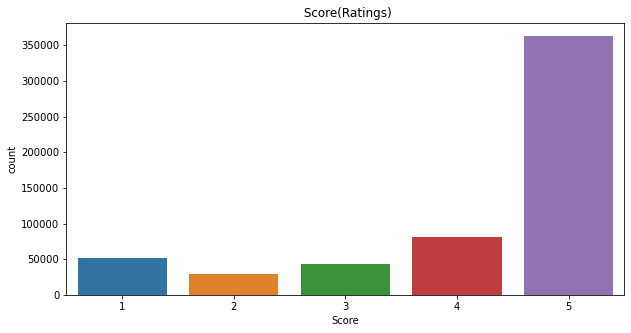

In [95]:
plt.figure(figsize=(10,5))
sns.countplot(x='Score',data=df)
plt.title(' Score(Ratings)')
plt.show()

In [96]:
df['Score'].value_counts()

5    363121
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

In [97]:
df.head()

,Product_Id,User_Id,Profile_Name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text,Helpfulness,sentiment
0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...,useless,negative
1,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...,>75%,positive
2,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...,>75%,negative
3,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wi...,useless,positive
4,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this ...,useless,positive


# here we have createing the 1more column from REVIEW_TEXT:

In [98]:
word_count = []
for i in df['Review_Text']:
    word_count.append(len(i.split()))
df['word_count'] = word_count    

In [99]:
word_count

[31,
 94,
 41,
 27,
 22,
 49,
 24,
 26,
 25,
 146,
 64,
 79,
 15,
 22,
 24,
 42,
 25,
 131,
 29,
 44,
 39,
 27,
 19,
 59,
 8,
 20,
 36,
 94,
 146,
 88,
 18,
 197,
 90,
 94,
 74,
 43,
 47,
 105,
 29,
 112,
 226,
 31,
 35,
 44,
 39,
 47,
 22,
 50,
 37,
 19,
 70,
 220,
 33,
 66,
 59,
 34,
 32,
 26,
 23,
 29,
 30,
 17,
 173,
 54,
 32,
 135,
 87,
 42,
 18,
 70,
 30,
 74,
 306,
 15,
 19,
 95,
 60,
 24,
 34,
 37,
 26,
 430,
 80,
 63,
 49,
 82,
 34,
 127,
 49,
 38,
 22,
 38,
 182,
 24,
 61,
 158,
 57,
 77,
 35,
 32,
 19,
 45,
 33,
 33,
 52,
 16,
 79,
 50,
 133,
 30,
 52,
 234,
 24,
 56,
 23,
 40,
 66,
 298,
 133,
 73,
 90,
 77,
 128,
 94,
 57,
 46,
 42,
 38,
 47,
 40,
 50,
 46,
 72,
 22,
 74,
 59,
 27,
 23,
 102,
 47,
 47,
 54,
 71,
 87,
 80,
 101,
 34,
 39,
 35,
 53,
 26,
 23,
 46,
 61,
 75,
 34,
 21,
 3,
 44,
 26,
 34,
 62,
 46,
 48,
 67,
 28,
 79,
 33,
 46,
 39,
 57,
 42,
 211,
 132,
 49,
 48,
 50,
 32,
 68,
 48,
 20,
 165,
 120,
 17,
 24,
 365,
 31,
 76,
 56,
 26,
 46,
 54,
 87,
 18,
 62,


In [100]:
df.head()

,Product_Id,User_Id,Profile_Name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text,Helpfulness,sentiment,word_count
0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...,useless,negative,31
1,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...,>75%,positive,94
2,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...,>75%,negative,41
3,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wi...,useless,positive,27
4,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this ...,useless,positive,22


In [101]:
df['word_count'].value_counts()

23      10192
22      10092
21       9905
20       9816
24       9802
        ...  
653         1
680         1
870         1
1199        1
748         1
Name: word_count, Length: 777, dtype: int64

In [102]:
df.shape

(568453, 12)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568453 entries, 0 to 568452
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Product_Id               568453 non-null  object
 1   User_Id                  568453 non-null  object
 2   Profile_Name             568453 non-null  object
 3   Helpfulness_Numerator    568453 non-null  int32 
 4   Helpfulness_Denominator  568453 non-null  int32 
 5   Score                    568453 non-null  int32 
 6   Time                     568453 non-null  int32 
 7   Review_Summary           568453 non-null  object
 8   Review_Text              568453 non-null  object
 9   Helpfulness              568453 non-null  object
 10  sentiment                568453 non-null  object
 11  word_count               568453 non-null  int64 
dtypes: int32(4), int64(1), object(7)
memory usage: 43.4+ MB


In [105]:
df3 = df[["Helpfulness","sentiment","word_count"]]

In [106]:
df3

,Helpfulness,sentiment,word_count
0,useless,negative,31
1,>75%,positive,94
2,>75%,negative,41
3,useless,positive,27
4,useless,positive,22
...,...,...,...
568448,useless,positive,26
568449,useless,negative,46
568450,>75%,positive,66
568451,>75%,positive,35


# POPULAR WORDS IN POSITIVE REVIEWS:(4-5 Rating)

In [107]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd


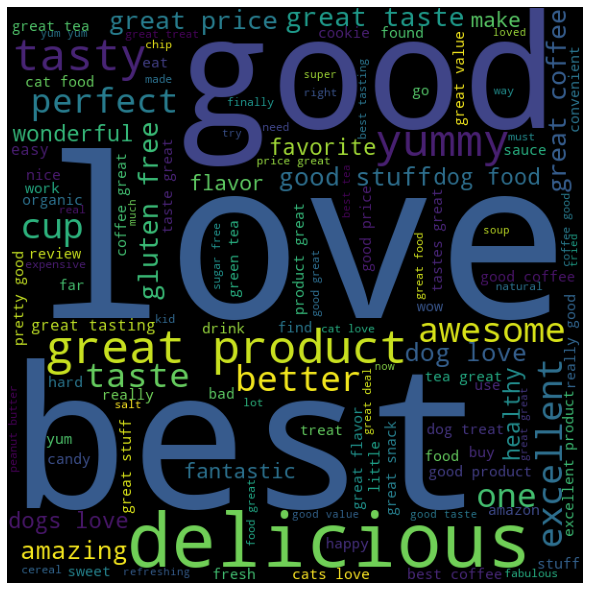

In [108]:
comment_words = ''
stopwords = set(STOPWORDS) #and,is,the,noisy words are  stop words.


for val in positive['Review_Summary']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 600, height = 600,
                background_color ='BLACK',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)    
    
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()     

# POPULAR WORDS IN NEGATIVE REVIEWS:(1-2 Rating)

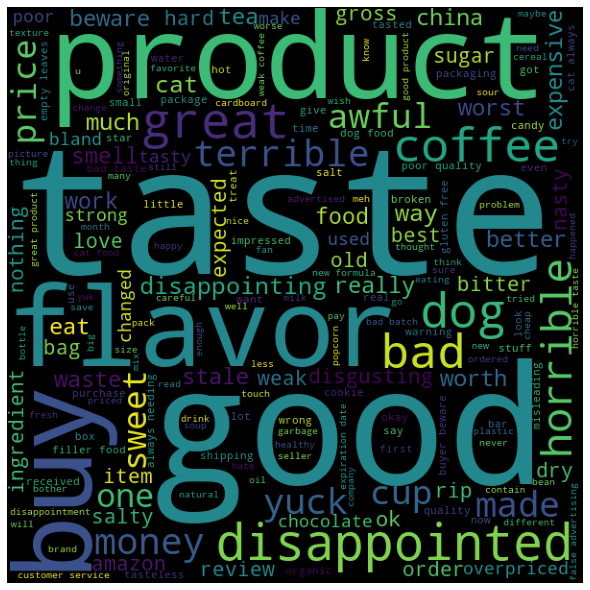

In [109]:
comment_words = ''
stopwords = set(STOPWORDS)

for val in negative['Review_Summary']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 600, height = 600,
                background_color ='bLACK',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)    
    
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# RATING EFFECT HELPFULNESS:

In [110]:
#here we are compairing the score and Helpfulness:

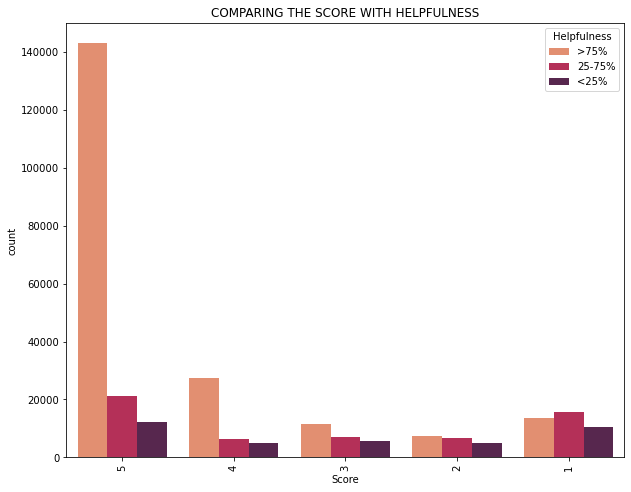

In [111]:
plt.figure(figsize=(10,8))
sns.countplot(x='Score',data=df,hue='Helpfulness',hue_order=['>75%','25-75%','<25%'],order=[5,4,3,2,1],palette="rocket_r")
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE SCORE WITH HELPFULNESS')
plt.show()

# word count by vary rating:

In [112]:
#for 1:

In [113]:
rating = df[df['Score']== 1].word_count.median()

In [114]:
rating

58.0

In [115]:
#for 2:

In [116]:
rating = df[df['Score']== 2].word_count.median()

In [117]:
rating

62.0

In [118]:
#for 3:

In [119]:
rating = df[df['Score']== 3].word_count.median()

In [120]:
rating

63.0

In [121]:
#for 4:

In [122]:
rating = df[df['Score']== 4].word_count.median()

In [123]:
rating

59.0

In [124]:
#for 5:

In [125]:
rating = df[df['Score']== 5].word_count.median()

In [126]:
rating

49.0

In [127]:
#count plot on score:

<AxesSubplot:xlabel='Score', ylabel='count'>

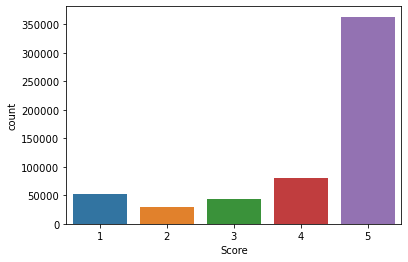

In [128]:
sns.countplot(x='Score',data=df)

# BOX PLOT:

In [129]:
#comparing of score and wordcount:

In [130]:
df['Score'].value_counts()

5    363121
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

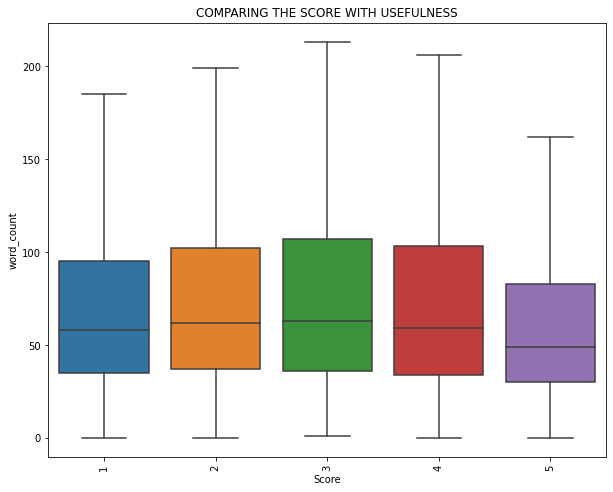

In [131]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Score',y='word_count',data=df,showfliers=False)
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE SCORE WITH USEFULNESS')
plt.show()

# VIOLIN PLOT:

In [132]:
# comparing HELPFULNESS AND WORDCOUNT:

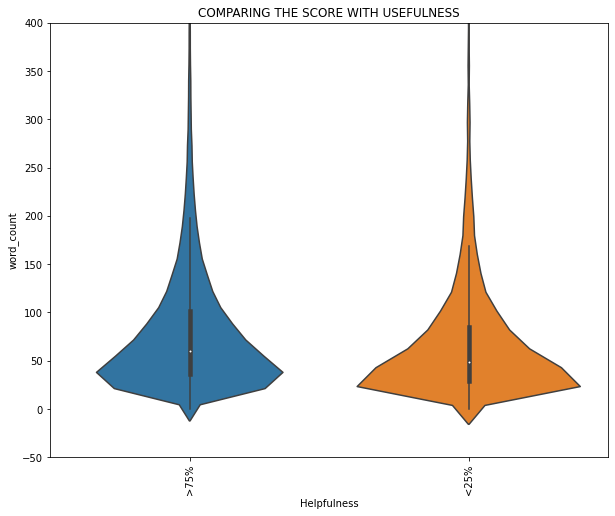

In [133]:
plt.figure(figsize=(10,8))
sns.violinplot(x='Helpfulness',y='word_count',data=df,order=['>75%','<25%'])
plt.ylim(-50, 400)
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE SCORE WITH USEFULNESS')
plt.show()

In [134]:
#here we are showing the pos and neg reviews count from sentiment column:

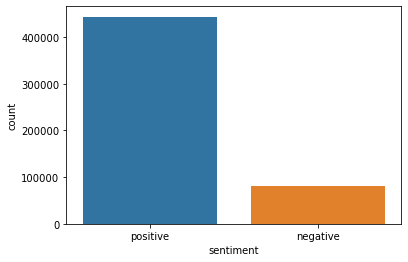

In [143]:
sns.countplot(x='sentiment', order=["positive", "negative"], data=df)
plt.xlabel('sentiment')
plt.show()


In [136]:
#from our data set pos reviews are having highest count:

In [137]:
df['sentiment'].value_counts()

positive    443776
negative     82037
neutal       42640
Name: sentiment, dtype: int64

In [138]:
df.head()

,Product_Id,User_Id,Profile_Name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text,Helpfulness,sentiment,word_count
0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...,useless,negative,31
1,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...,>75%,positive,94
2,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...,>75%,negative,41
3,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wi...,useless,positive,27
4,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this ...,useless,positive,22


In [139]:
#here we have created one csv file from df:

In [140]:
df.to_csv('Sentiment_Analysis_1.csv',index=False)

In [141]:
df.head()

,Product_Id,User_Id,Profile_Name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text,Helpfulness,sentiment,word_count
0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...,useless,negative,31
1,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...,>75%,positive,94
2,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...,>75%,negative,41
3,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wi...,useless,positive,27
4,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this ...,useless,positive,22
